In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import Planck
from scipy.constants import elementary_charge
h = Planck
e = elementary_charge

In [2]:
file_path = 'current.csv'
data = pd.read_csv(file_path)
R_f = 1e5

In [3]:
data = data*1e-2
data

I
0     0.26
1     0.26
2    -0.07
3    -0.06
4    -0.07
...    ...
3995  0.09
3996  0.16
3997  0.14
3998  0.19
3999  0.19

[4000 rows x 1 columns]

In [4]:
n = data.size
n

4000

In [5]:
data_points = n

In [6]:
time = np.arange(0,data_points)
time = time*2.5e-5
time

array([0.0000e+00, 2.5000e-05, 5.0000e-05, ..., 9.9925e-02, 9.9950e-02,
       9.9975e-02])

In [7]:
data_new = data[:data_points]
data_new = data_new/R_f
data_new

I
0     2.600000e-06
1     2.600000e-06
2    -7.000000e-07
3    -6.000000e-07
4    -7.000000e-07
...            ...
3995  9.000000e-07
3996  1.600000e-06
3997  1.400000e-06
3998  1.900000e-06
3999  1.900000e-06

[4000 rows x 1 columns]

In [8]:
current = data_new

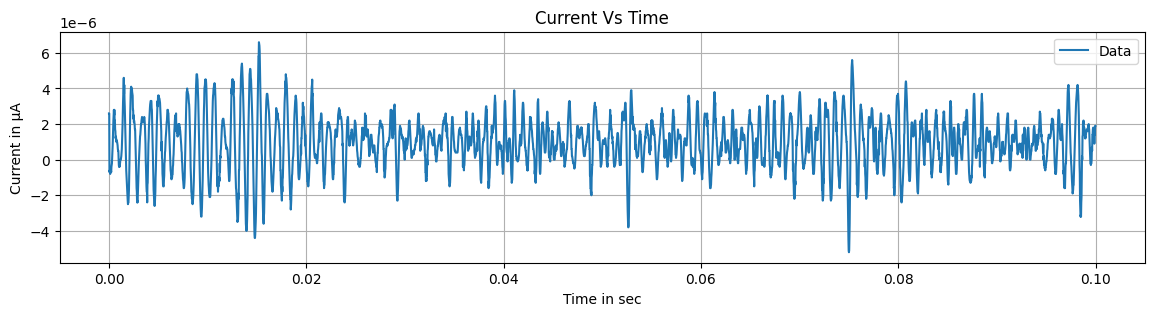

In [9]:
plt.figure(figsize=(14,3))
plt.plot(time, current, marker='', label='Data')
plt.title('Current Vs Time')
plt.xlabel('Time in sec')
plt.ylabel('Current in \u00B5A')
plt.legend()
plt.grid(True)
plt.savefig('Current graph.png')
plt.show()

In [10]:
ste = e*e/h
ste = ste*2
ste

7.748091729863649e-05

In [11]:
v = 0.0133
conductance = current/v
steps = ste
conductance = conductance/steps

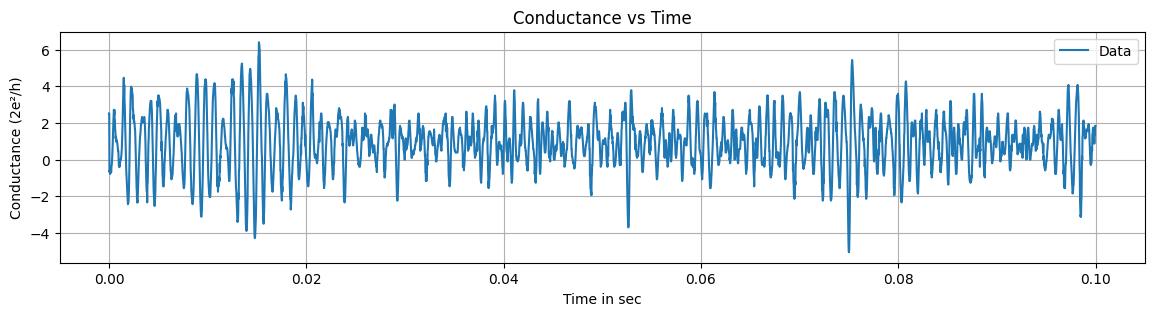

In [12]:
plt.figure(figsize=(14,3))
plt.plot(time, conductance, marker='', label='Data')
plt.title('Conductance vs Time')
plt.xlabel('Time in sec')
plt.ylabel('Conductance (2e\u00b2/h)')
plt.legend()
plt.grid(True)
plt.savefig('conductance_graph.png')
plt.show()


In [13]:
fft_result = np.fft.fft(data_new)
frequencies = np.fft.fftfreq(len(data_new))

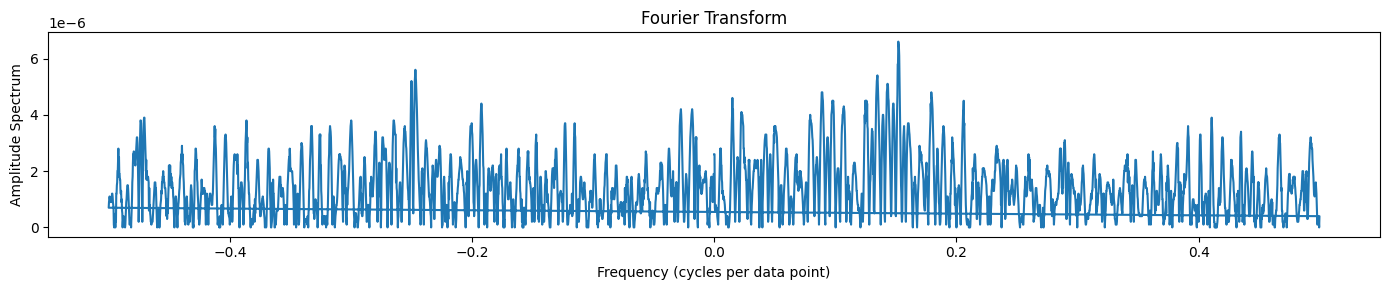

In [14]:
plt.figure(figsize=(14, 3))

plt.plot(frequencies, np.abs(fft_result), marker='')
plt.title('Fourier Transform')
plt.xlabel('Frequency (cycles per data point)')
plt.ylabel('Amplitude Spectrum')

plt.tight_layout()
plt.savefig('Frequency_graph.png')
plt.show()
